In [1]:
import non_local_detector

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Cupy is not installed or GPU is not detected. Ignore this message if not using GPU
/Users/edeno/miniconda3/envs/non_local_detector/lib/python3.11/site-packages/replay_trajectory_classification/likelihoods/multiunit_likelihood.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
non_local_detector.__version__

'0.1.dev8+gd001044.d20230607'

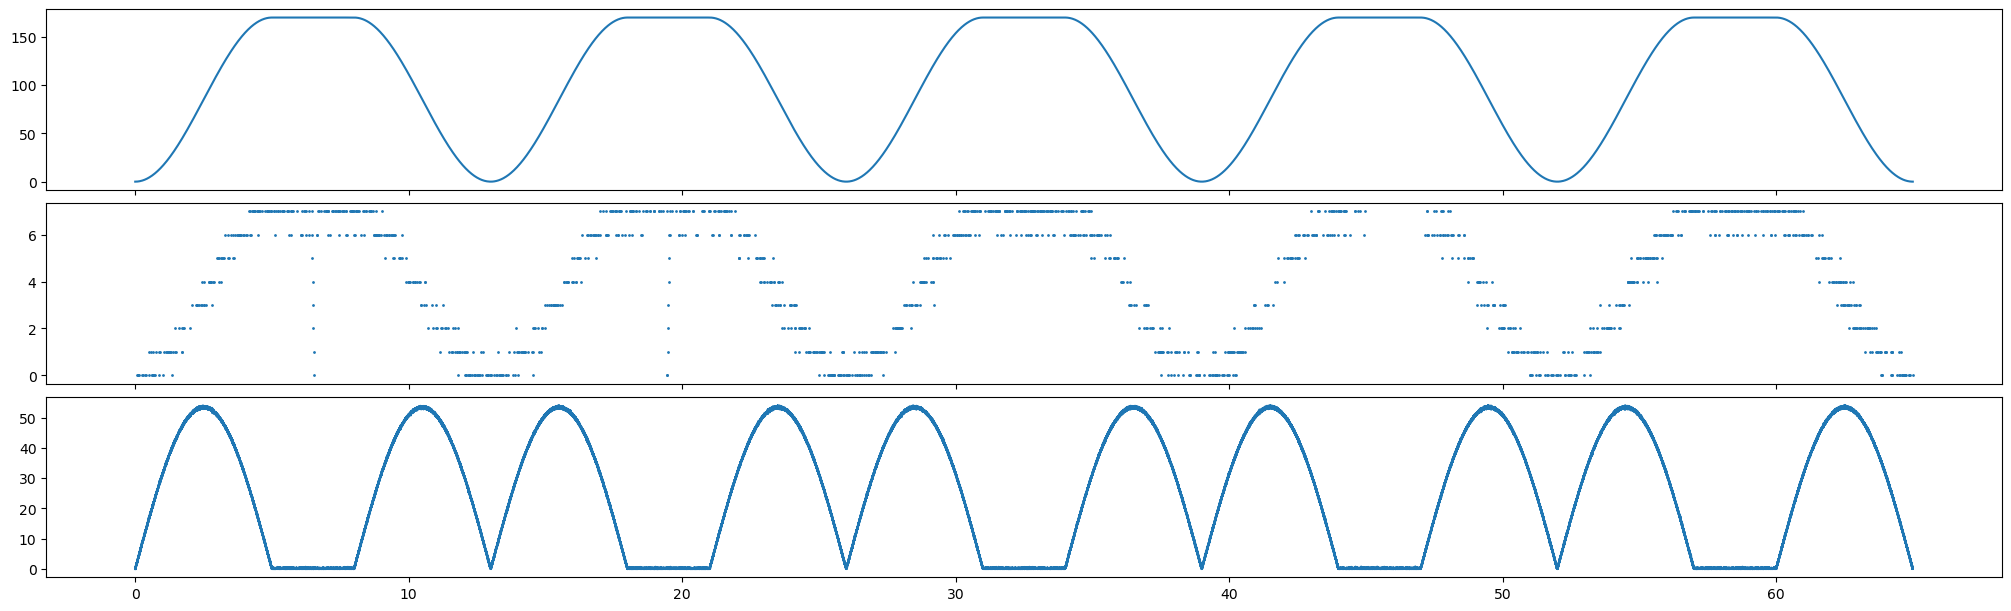

In [3]:
from non_local_detector.simulate.sorted_spikes_simulation import make_simulated_data

import matplotlib.pyplot as plt
import numpy as np

speed, position, spikes, time, ripple_times, sampling_frequency = make_simulated_data()

is_ripple = np.zeros_like(time, dtype=bool)
for ripple_time in ripple_times:
    is_ripple |= (time >= ripple_time[0]) & (time <= ripple_time[1])


fig, axes = plt.subplots(3, 1, sharex=True, constrained_layout=True, figsize=(20, 6))
axes[0].plot(time, position)
spike_time_ind, neuron_ind = np.nonzero(spikes)
axes[1].scatter(time[spike_time_ind], neuron_ind, s=1)
axes[2].plot(time, speed)

In [4]:
from non_local_detector import SortedSpikesDetector

detector = SortedSpikesDetector(
    sorted_spikes_algorithm="sorted_spikes_glm_jax",
    sorted_spikes_algorithm_params={},
)

In [5]:
detector.initialize_environments(position)

In [6]:
detector.initialize_state_index()

In [7]:
detector.state_ind_

array([0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [8]:
detector.bin_sizes_

array([ 1,  1, 86, 86])

In [9]:
detector.initialize_initial_conditions()

In [11]:
detector.initial_conditions_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [12]:
detector.initial_conditions_.sum()

1.0

In [13]:
detector.discrete_initial_conditions

array([1., 0., 0., 0.])

In [14]:
detector.discrete_initial_conditions

array([1., 0., 0., 0.])

In [15]:
detector.discrete_initial_conditions.sum()

1.0

In [16]:
detector.continuous_initial_conditions_

array([1.        , 1.        , 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162791,
       0.01162791, 0.01162791, 0.01162791, 0.01162791, 0.01162

In [17]:
detector.initialize_continuous_state_transition()

In [18]:
for i in range(4):
    for j in range(4):
        print(
            detector.continuous_state_transitions_[
                np.ix_(detector.state_ind_ == i, detector.state_ind_ == j)
            ].sum(axis=-1)
        )

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 

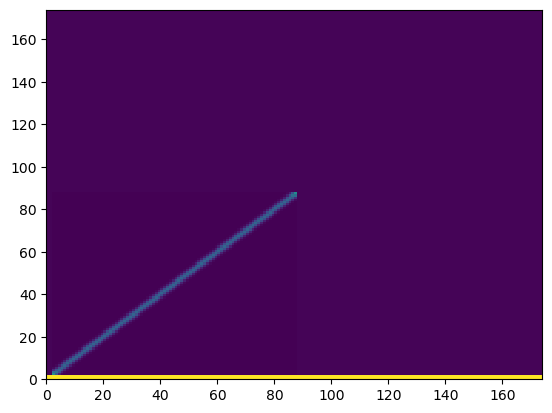

In [20]:
plt.pcolormesh(detector.continuous_state_transitions_.T)

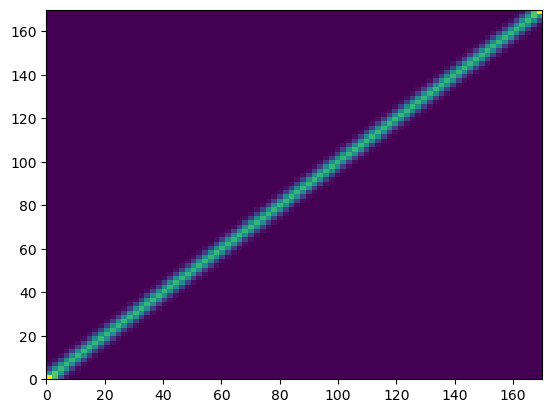

In [26]:
plt.pcolormesh(detector.environments[0].edges_[0], detector.environments[0].edges_[0], 
               detector.continuous_state_transitions_[np.ix_(detector.state_ind_ == 2, detector.state_ind_ == 2)])

In [21]:
detector.initialize_discrete_state_transition()

In [23]:
detector.discrete_state_transitions_

array([[0.9       , 0.03333333, 0.03333333, 0.03333333],
       [0.03333333, 0.9       , 0.03333333, 0.03333333],
       [0.03333333, 0.03333333, 0.9       , 0.03333333],
       [0.00666667, 0.00666667, 0.00666667, 0.98      ]])

In [24]:
detector.discrete_state_transitions_.sum(axis=-1)

array([1., 1., 1., 1.])

In [27]:
blah = (
    detector.continuous_state_transitions_
    * detector.discrete_state_transitions_[
        np.ix_(detector.state_ind_, detector.state_ind_)
    ]
)
blah

array([[9.00000000e-01, 3.33333333e-02, 3.87596899e-04, ...,
        3.87596899e-04, 3.87596899e-04, 3.87596899e-04],
       [3.33333333e-02, 9.00000000e-01, 3.87596899e-04, ...,
        3.87596899e-04, 3.87596899e-04, 3.87596899e-04],
       [3.33333333e-02, 3.33333333e-02, 4.38373453e-01, ...,
        3.87596899e-04, 3.87596899e-04, 3.87596899e-04],
       ...,
       [6.66666667e-03, 6.66666667e-03, 7.75193798e-05, ...,
        1.13953488e-02, 1.13953488e-02, 1.13953488e-02],
       [6.66666667e-03, 6.66666667e-03, 7.75193798e-05, ...,
        1.13953488e-02, 1.13953488e-02, 1.13953488e-02],
       [6.66666667e-03, 6.66666667e-03, 7.75193798e-05, ...,
        1.13953488e-02, 1.13953488e-02, 1.13953488e-02]])

In [28]:
blah.sum(axis=-1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [29]:
(
    time,
    acausal_posterior,
    acausal_state_probabilities,
    marginal_log_likelihoods,
) = detector.estimate_parameters(position, spikes)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -11220.4365234375
Expectation Step
Maximization Step
Stats
iteration 2, likelihood: -11513.623046875, change: -293.1865234375
Expectation Step


KeyboardInterrupt: 

In [ ]:
plt.plot(np.exp(detector.log_likelihood_[65][detector.state_ind_ == 2]))

In [ ]:
np.nonzero(spikes.sum(axis=1))[0]

In [ ]:
import matplotlib.colors as colors
import copy


def plot_likelihood_ratio(
    time_slice,
    log_likelihood,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    env,
    time,
    state_ind,
    state_names,
    figsize=(10, 10),
    posterior_max=0.25,
):
    likelihood = np.exp(log_likelihood[time_slice, state_ind == 2])
    spike_time_ind, neuron_ind = np.nonzero(spikes[time_slice, :])
    is_spike = np.zeros_like(time[time_slice], dtype=bool)
    is_spike[spike_time_ind] = True
    likelihood[~is_spike, :] = np.nan
    likelihood[:, ~env.is_track_interior_] = np.nan

    likelihood_ratio = np.exp(
        log_likelihood[time_slice, state_ind == 2]
        - log_likelihood[time_slice, state_ind == 0]
    )
    likelihood_ratio[:, ~env.is_track_interior_] = np.nan

    conditional_non_local_acausal_posterior = (
        acausal_posterior[time_slice, state_ind == 2]
        + acausal_posterior[time_slice, state_ind == 3]
    ) / (
        acausal_state_probabilities[time_slice, [2]]
        + acausal_state_probabilities[time_slice, [3]]
    )
    conditional_non_local_acausal_posterior[:, ~env.is_track_interior_] = np.nan

    neuron_place_bin = env.place_bin_centers_[
        np.nanargmax(non_local_rates, axis=0)
    ].squeeze()

    t, x = np.meshgrid(time[time_slice], env.place_bin_centers_)

    fig, axes = plt.subplots(
        3,
        1,
        figsize=figsize,
        sharex=True,
        constrained_layout=True,
        gridspec_kw={"height_ratios": [3, 3, 1]},
    )

    cmap = copy.deepcopy(plt.get_cmap("RdBu_r"))
    cmap.set_bad(color="lightgrey")
    h = axes[0].pcolormesh(
        t, x, likelihood_ratio.T, norm=colors.LogNorm(vmin=1 / 10, vmax=10), cmap=cmap
    )
    plt.colorbar(h, ax=axes[0])
    axes[0].scatter(time[time_slice], position[time_slice], color="magenta", s=1)
    axes[0].scatter(
        time[time_slice][spike_time_ind],
        neuron_place_bin[neuron_ind],
        color="black",
        s=10,
    )

    cmap = copy.deepcopy(plt.get_cmap("bone_r"))
    cmap.set_bad(color="lightgrey")
    h = axes[1].pcolormesh(
        t,
        x,
        conditional_non_local_acausal_posterior.T,
        cmap=cmap,
        vmin=0.0,
        vmax=posterior_max,
    )
    plt.colorbar(h, ax=axes[1])
    axes[1].scatter(time[time_slice], position[time_slice], color="magenta", s=1)

    axes[2].plot(
        time[time_slice], acausal_state_probabilities[time_slice], label=state_names
    )
    axes[2].set_ylim(0, 1.05)
    axes[2].set_ylabel("Prob.")
    axes[2].legend()

In [ ]:
non_local_rates = np.zeros(
    (detector.environments[0].place_bin_centers_.shape[0], spikes.shape[1])
)
time = np.arange(spikes.shape[0]) / sampling_frequency

plot_likelihood_ratio(
    slice(10_000, 20_000),
    detector.log_likelihood_,
    acausal_posterior,
    acausal_state_probabilities,
    non_local_rates,
    spikes,
    position,
    detector.environments[0],
    time,
    detector.state_ind_,
    detector.state_names,
    figsize=(10, 10),
    posterior_max=0.25,
)

In [ ]:
def plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    figsize=(20, 5),
    time_slice=None,
    posterior_max=0.25,
):
    if time_slice is None:
        time_slice = slice(0, len(time))

    _, axes = plt.subplots(
        4,
        1,
        sharex=True,
        constrained_layout=True,
        figsize=figsize,
        gridspec_kw={"height_ratios": [2, 1, 3, 1]},
    )

    sliced_time = time[time_slice]

    t, x = np.meshgrid(sliced_time, env.place_bin_centers_)

    neuron_sort_ind = np.argsort(
        env.place_bin_centers_[np.nanargmax(non_local_rates, axis=0)].squeeze()
    )
    spike_time_ind, neuron_ind = np.nonzero(spikes[time_slice][:, neuron_sort_ind])

    conditional_non_local_acausal_posterior = (
        acausal_posterior[time_slice, state_ind == 2]
        + acausal_posterior[time_slice, state_ind == 3]
    ) / (
        acausal_state_probabilities[time_slice, [2]]
        + acausal_state_probabilities[time_slice, [3]]
    )
    conditional_non_local_acausal_posterior[:, ~env.is_track_interior_] = np.nan

    axes[0].scatter(sliced_time[spike_time_ind], neuron_ind, s=1)
    axes[0].set_ylabel("Neuron")

    h = axes[1].plot(sliced_time, acausal_state_probabilities[time_slice])
    axes[1].legend(h, state_names)
    axes[1].set_ylabel("Probability")
    axes[1].set_ylim((0.0, 1.05))

    n_states = len(state_names)
    axes[2].pcolormesh(
        t,
        x,
        conditional_non_local_acausal_posterior.T,
        vmin=0.0,
        vmax=posterior_max,
        cmap="bone_r",
    )
    axes[2].scatter(sliced_time, position[time_slice], s=1, color="magenta", zorder=2)
    axes[2].set_ylabel("Position [cm]")
    axes[3].fill_between(sliced_time, speed[time_slice], color="lightgrey", zorder=2)
    axes[3].set_ylabel("Speed [cm / s]")
    plt.xlim((sliced_time.min(), sliced_time.max()))
    plt.xlabel("Time [ms]")

In [ ]:
plot_switching_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    detector.environments[0],
    detector.state_ind_,
    acausal_state_probabilities,
    acausal_posterior,
    detector.state_names,
    figsize=(20, 5),
    time_slice=slice(10_000, 20_000),
    posterior_max=0.25,
)

In [ ]:
import xarray as xr

data_vars = {
    "acausal_posterior": (("time", "state_bins"), acausal_posterior),
    "acausal_state_probabilities": (("time", "states"), acausal_state_probabilities),}
environment_names = [obs.environment_name for obs in detector.observation_models]
encoding_group_names = [obs.encoding_group for obs in detector.observation_models]
coords = {
    "time": time,
    "state_bins": detector.state_ind_,
    "states": np.asarray(detector.state_names),
    "environments": ("states", environment_names),
    "encoding_groups": ("states", encoding_group_names),
}

position = []
n_position_dims = detector.environments[0].place_bin_centers_.shape[1]
for obs in detector.observation_models:
    if obs.is_local or obs.is_no_spike:
        nan_array = np.array([np.nan] * n_position_dims)
        if n_position_dims == 1:
            nan_array = nan_array[:, np.newaxis]
        position.append(nan_array)
    else:
        environment = detector.environments[
            detector.environments.index(obs.environment_name)
        ]
        position.append(environment.place_bin_centers_)
position = np.concatenate(position, axis=0)

coords["position"] = (("state_bins", "position_dims"), position)

attrs = {"marginal_log_likelihoods": marginal_log_likelihoods}

results = xr.Dataset(
    data_vars=data_vars,
    coords=coords,
    attrs=attrs,
)
results

In [ ]:
results.position